In [109]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import requests
from bs4 import BeautifulSoup
import html
from sklearn.metrics.pairwise import linear_kernel
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt

https://gradstudies.engineering.utoronto.ca/professional-degrees/emphasis-in-analytics/

In [2]:
# first lets construct the df of the courses at the site
url = 'https://gradstudies.engineering.utoronto.ca/professional-degrees/emphasis-in-analytics/'
uoft_page = requests.get(url)
uftSoup = BeautifulSoup(uoft_page.text,'lxml')

In [3]:
# here we will store the prerequisite courses and core courses in a list
prereq = uftSoup.find('div',class_='entry-content').find('h4').find_next('p').text
core=uftSoup.find('div',class_='entry-content').find('h4').find_next_sibling('h4').find_next('p').text.split('\n')

In [40]:
# here we store the elective courses in a list
elec_class_list = uftSoup.find('div',class_='entry-content').find('h4').find_next_sibling('h4').find_next_sibling('h4').find_all_next('p')[:-2]
elec_class_list = [elec_class.text for elec_class in elec_class_list]
# these courses had no space between the code and dep.
elec_class_list[9] = 'CHE 1147H: Data Mining in Engineering'
elec_class_list[19] = 'ECE 1504H: Statistical Learning'
elec_class_list[34] = 'MIE 1628H: Big Data Science'

In [41]:
elec_class_list

['APS 502H: Financial Engineering',
 'APS 1005H: Operations Research for Engineering Management',
 'APS 1017H: Supply Chain Management and Logistics',
 'APS 1022H: Financial Engineering II',
 'APS 1040H: Quality Control for Engineering Management',
 'APS 1050H: Blockchain Technologies',
 'APS 1051H: Portfolio Management Praxis Under Real Market Constraint',
 'APS 1052H: A.I. in Finance',
 'CHE 507H: Data-based Modelling for Prediction and Control',
 'CHE 1147H: Data Mining in Engineering',
 'CHE 1148H: Process Data Analytics',
 'CHE 1434H: Six Sigma for Chemical Processes',
 'CIV 1504H: Applied Probability and Statistics for Civil Engineering',
 'CIV 1506H: Freight Transportation and ITS Applications',
 'CIV 1507H: Public Transport',
 'CIV 1532H: Fundamentals of ITS and Traffic Management',
 'CIV 1538H: Transportation Demand Analysis',
 'CEM 1002H: Empirical Study of Cities',
 'ECE 537H: Random Processes',
 'ECE 1504H: Statistical Learning',
 'ECE 1505H: Convex Optimization',
 'ECE 151

In [6]:
# scraping the pillars - descriptive, predictive, prescriptive. We can also add department if that will change results
pillars = uftSoup.find('th').find_next_siblings('th')
pillars = [pillar.text for pillar in pillars]
#pillars = ['Department']+pillars

In [7]:
# here I scrape for all elective classes pertaining to one of the 3 pillars. This cell REMOVES THE formatting of the table
desc_classes = uftSoup.find('tbody',class_ = 'row-hover').find_all_next('td',class_='column-2')
desc_classes = [desc_class.text for desc_class in desc_classes if desc_class.text != '']
pred_classes = uftSoup.find('tbody',class_ = 'row-hover').find_all_next('td',class_='column-3')
pred_classes = [pred_class.text for pred_class in pred_classes if pred_class.text != '']
pres_classes = uftSoup.find('tbody',class_ = 'row-hover').find_all_next('td',class_='column-4')
pres_classes = [pres_class.text for pres_class in pres_classes if pres_class.text != '']
# store in a dictionary where keys are the pillars
class_dict = {pillars[0]:desc_classes,pillars[1]:pred_classes,pillars[2]:pres_classes} 
class_df = pd.DataFrame.from_dict(class_dict,orient = 'Index').T
class_df

,Descriptive,Predictive,Prescriptive
0,CHE 1434H: Six Sigma for Chemical Processes,CHE 507H: Data-based Modelling for Prediction ...,CHE 507H: Data-based Modelling for Prediction ...
1,CHE 507H: Data-based Modelling for Prediction ...,CIV 1507H: Public Transport,CIV 1506H: Freight Transportation and ITS Appl...
2,CIV 1504H: Applied Probability and Statistics ...,CIV 1532H: Fundamentals of ITS and Traffic Man...,CIV 1507H: Public Transport
3,CIV 1507H: Public Transport,CIV 1538H: Transportation Demand Analysis,CIV 1532H: Fundamentals of ITS and Traffic Man...
4,CIV 1532H: Fundamentals of ITS and Traffic Man...,CEM 1002H: Empirical Study of Cities,CIV 1538H: Transportation Demand Analysis
5,CIV 1538H: Transportation Demand Analysis,ECE 1504H: Statistical Learning,ECE 1505H: Convex Optimization
6,CEM 1002H: Empirical Study of Cities,ECE 1510H: Advanced Inference Algorithms,ECE 1657H: Game Theory and Evolutionary Games
7,ECE 537H: Random Processes,MIE 1413H: Statistical Models in Empirical Res...,MIE 562H: Scheduling
8,ECE 1778H: Creative Applications for Mobile De...,MIE 1501H: Knowledge Modelling and Management,MIE 1501H: Knowledge Modelling and Management
9,ECE 1779H: Introduction to Cloud Computing,MIE 1512H: Data Analytics,MIE 1620H: Linear Programming and Network Flows


In [8]:
# here I scrape for all elective classes pertaining to one of the 3 pillars. This cell KEEPS THE formatting of the table
desc_classes = uftSoup.find('tbody',class_ = 'row-hover').find_all_next('td',class_='column-2')
desc_classes = [desc_class.text for desc_class in desc_classes]
pred_classes = uftSoup.find('tbody',class_ = 'row-hover').find_all_next('td',class_='column-3')
pred_classes = [pred_class.text for pred_class in pred_classes]
pres_classes = uftSoup.find('tbody',class_ = 'row-hover').find_all_next('td',class_='column-4')
pres_classes = [pres_class.text for pres_class in pres_classes]
# store in a dictionary where keys are the pillars
class_dict = {pillars[0]:desc_classes,pillars[1]:pred_classes,pillars[2]:pres_classes}
class_df = pd.DataFrame.from_dict(class_dict)
class_df

,Descriptive,Predictive,Prescriptive
0,CHE 1434H: Six Sigma for Chemical Processes,CHE 507H: Data-based Modelling for Prediction ...,CHE 507H: Data-based Modelling for Prediction ...
1,CHE 507H: Data-based Modelling for Prediction ...,,
2,,,
3,CIV 1504H: Applied Probability and Statistics ...,CIV 1507H: Public Transport,
4,CIV 1507H: Public Transport,CIV 1532H: Fundamentals of ITS and Traffic Man...,CIV 1506H: Freight Transportation and ITS Appl...
5,CIV 1532H: Fundamentals of ITS and Traffic Man...,CIV 1538H: Transportation Demand Analysis,CIV 1507H: Public Transport
6,CIV 1538H: Transportation Demand Analysis,,CIV 1532H: Fundamentals of ITS and Traffic Man...
7,,,CIV 1538H: Transportation Demand Analysis
8,CEM 1002H: Empirical Study of Cities,CEM 1002H: Empirical Study of Cities,
9,ECE 537H: Random Processes,ECE 1504H: Statistical Learning,ECE 1505H: Convex Optimization


Recommender: 
Recommend certain electives based on the students interest, previous elective courses, specialization
need to ask questions to get information on the course

In [47]:
elec_title = []
elec_dep = []
elec_code = []
elec_pillar = []
for elec in elec_class_list:
    if elec in desc_classes:
        elec_pillar.append('descriptive')
    elif elec in pred_classes:
        elec_pillar.append('predictive')
    elif elec in pres_classes:
        elec_pillar.append('prescriptive')
    else:
        elec_pillar.append('None')
    elec_dep.append(elec.split(':')[0][:3])
    elec_code.append(elec.split(':')[0][3:].strip())
    elec_title.append(elec.split(':')[1].strip())
    
    
elec_dict = {'Course Department':elec_dep,'Course Code':elec_code,'Course Title':elec_title, 'Pillar':elec_pillar}  

In [93]:
elec_title

['Financial Engineering',
 'Operations Research for Engineering Management',
 'Supply Chain Management and Logistics',
 'Financial Engineering II',
 'Quality Control for Engineering Management',
 'Blockchain Technologies',
 'Portfolio Management Praxis Under Real Market Constraint',
 'A.I. in Finance',
 'Data-based Modelling for Prediction and Control',
 'Data Mining in Engineering',
 'Process Data Analytics',
 'Six Sigma for Chemical Processes',
 'Applied Probability and Statistics for Civil Engineering',
 'Freight Transportation and ITS Applications',
 'Public Transport',
 'Fundamentals of ITS and Traffic Management',
 'Transportation Demand Analysis',
 'Empirical Study of Cities',
 'Random Processes',
 'Statistical Learning',
 'Convex Optimization',
 'Advanced Inference Algorithms',
 'Game Theory and Evolutionary Games',
 'Creative Applications for Mobile Devices',
 'Introduction to Cloud Computing',
 'Scheduling',
 'Statistical Models in Empirical Research',
 'Knowledge Modelling a

In [94]:
elec_df = pd.DataFrame(elec_dict)
elec_df_init = elec_df.copy() # save the initial dataframe
elec_df.to_csv('elective_data.csv')
elec_df = pd.read_csv('elective_data_courses_final.csv',encoding='unicode_escape')
elec_df = elec_df[['Course Department','Course Code','Course Title','Pillar','Prof','Description']]

In [95]:
elec_df

,Course Department,Course Code,Course Title,Pillar,Prof,Description
0,APS,502H,Financial Engineering,prescriptive,Roy Kwon,"This course will focus on capital budgeting, f..."
1,APS,1005H,Operations Research for Engineering Management,prescriptive,Daniel Frances,This course introduces optimization techniques...
2,APS,1017H,Supply Chain Management and Logistics,prescriptive,C.G. Lee,This course is to provide students with a fram...
3,APS,1022H,Financial Engineering II,prescriptive,"Roy H. Kwon, C.G. Lee",The course presents two important topics in fi...
4,APS,1040H,Quality Control for Engineering Management,None,Daniel Frances,This course introduces quality control techniq...
5,APS,1050H,Blockchain Technologies,None,Loren Trigo and Sabatino Costanzo,Bitcoin is a particular implementation of Bloc...
6,APS,1051H,Portfolio Management Praxis Under Real Market ...,None,Sabatino Costanzo and Loren Trigo,After an introductory review of the techniques...
7,APS,1052H,A.I. in Finance,None,Sabatino Costanzo and Loren Trigo,In this course well give an overview of sever...
8,CHE,507H,Data-based Modelling for Prediction and Control,descriptive,NaN,NaN
9,CHE,1147H,Data Mining in Engineering,None,NaN,An exceptional ability to deal with data is th...


In [96]:
elec_df = elec_df.fillna('')

In [97]:
for col in elec_df.columns:
    elec_df[col] = elec_df[col].apply(lambda x: html.unescape(x).lower())

In [98]:
elec_df

,Course Department,Course Code,Course Title,Pillar,Prof,Description
0,aps,502h,financial engineering,prescriptive,roy kwon,"this course will focus on capital budgeting, f..."
1,aps,1005h,operations research for engineering management,prescriptive,daniel frances,this course introduces optimization techniques...
2,aps,1017h,supply chain management and logistics,prescriptive,c.g. lee,this course is to provide students with a fram...
3,aps,1022h,financial engineering ii,prescriptive,"roy h. kwon, c.g. lee",the course presents two important topics in fi...
4,aps,1040h,quality control for engineering management,none,daniel frances,this course introduces quality control techniq...
5,aps,1050h,blockchain technologies,none,loren trigo and sabatino costanzo,bitcoin is a particular implementation of bloc...
6,aps,1051h,portfolio management praxis under real market ...,none,sabatino costanzo and loren trigo,after an introductory review of the techniques...
7,aps,1052h,a.i. in finance,none,sabatino costanzo and loren trigo,in this course well give an overview of sever...
8,che,507h,data-based modelling for prediction and control,descriptive,,
9,che,1147h,data mining in engineering,none,,an exceptional ability to deal with data is th...


In [100]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(elec_df['Description'])

In [103]:
tfidf_matrix

<39x1035 sparse matrix of type '<class 'numpy.float64'>'
	with 1788 stored elements in Compressed Sparse Row format>

In [104]:
# Find the similarity matrix between the courses
similarity = linear_kernel(tfidf_matrix,tfidf_matrix)

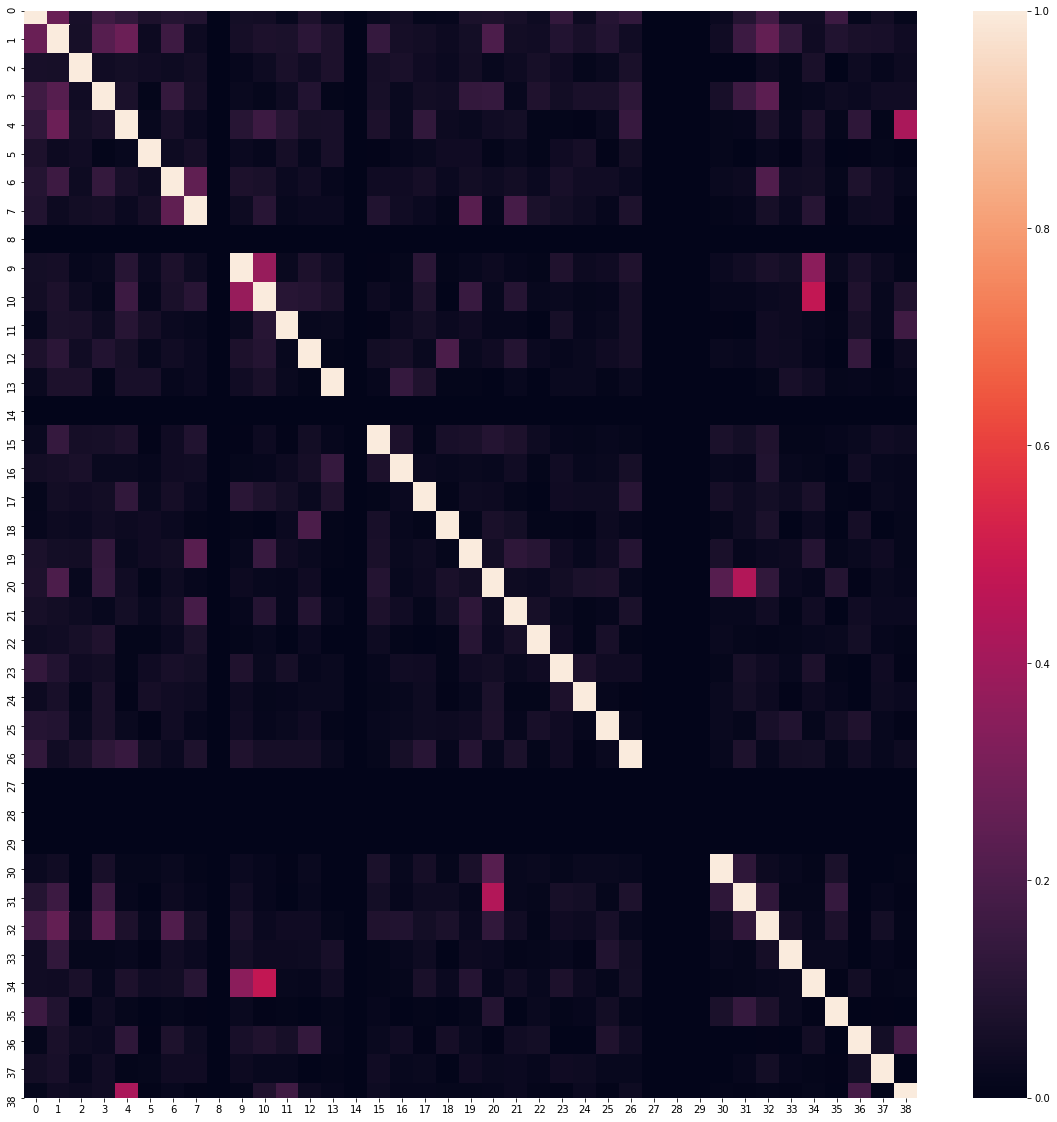

In [110]:
plt.figure(figsize = (20,20))
sns.heatmap(similarity,)